## Step 1: Load and Visualize Data

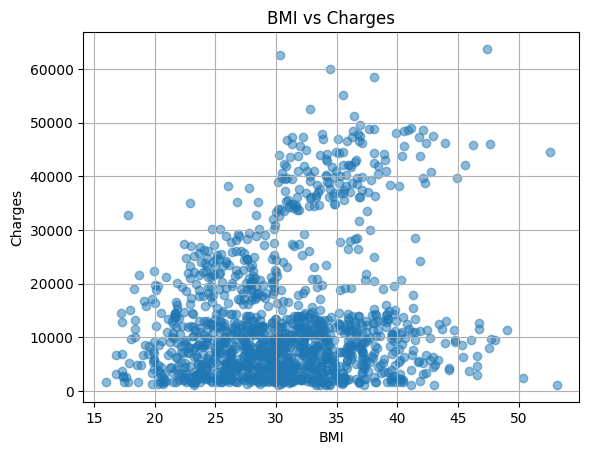

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/insurance.csv")
X = df['bmi'].values
y = df['charges'].values

plt.scatter(X, y, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.grid(True)
plt.show()

## Step 2: Define Cost Function (MSE)

In [3]:
import numpy as np

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def predict(X, w, b):
    return w * X + b

w, b = 0, 0
y_pred = predict(X, w, b)
mse = compute_mse(y, y_pred)
print(f"MSE with w=0 and b=0: {mse}")

MSE with w=0 and b=0: 322646873.5887047


## Step 3: Gradient Descent Function

### 🧮 Mean Squared Error (MSE)

The objective of linear regression is to minimize the **Mean Squared Error (MSE)** between the true values and the predicted values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
$$

---

### 🎯 Goal

Minimize the MSE by computing the partial derivatives of the loss function with respect to **w** and **b**.

---

### ✏️ Gradient Derivation

**1. Gradient with respect to** $w$:

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum (x_i \cdot (y_i - \hat{y}_i)) = -\frac{2}{n} X^T(y - \hat{y})
$$

**2. Gradient with respect to** $b$:

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum (y_i - \hat{y}_i)
$$

---

### 🌀 Intuition

- These gradients point in the direction of **steepest increase** in loss.  
- To minimize the loss, we **subtract** them during parameter update (i.e., gradient descent).
- Hence:

```python
w -= lr * dw
b -= lr * db


In [4]:
def gradient_descent(X, y, lr=0.0001, epochs=300):
    n = len(X)
    w, b = 0.0, 0.0
    loss_history = []

    for epoch in range(epochs):
        y_pred = w * X + b
        error = y - y_pred
        mse = np.mean(error ** 2)
        loss_history.append(mse)

        dw = -(2/n) * np.dot(X, error)
        db = -(2/n) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: MSE = {mse:.2f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, loss_history

w_final, b_final, losses = gradient_descent(X, y)

Epoch 0: MSE = 322646873.59, w = 84.3105, b = 2.6541
Epoch 10: MSE = 143165757.32, w = 391.5980, b = 12.3844
Epoch 20: MSE = 140860756.88, w = 426.4189, b = 13.5666
Epoch 30: MSE = 140831146.90, w = 430.3624, b = 13.7800
Epoch 40: MSE = 140830758.71, w = 430.8069, b = 13.8836
Epoch 50: MSE = 140830745.79, w = 430.8547, b = 13.9747
Epoch 60: MSE = 140830737.70, w = 430.8577, b = 14.0644
Epoch 70: MSE = 140830729.68, w = 430.8555, b = 14.1540
Epoch 80: MSE = 140830721.65, w = 430.8528, b = 14.2436
Epoch 90: MSE = 140830713.63, w = 430.8500, b = 14.3331
Epoch 100: MSE = 140830705.60, w = 430.8472, b = 14.4226
Epoch 110: MSE = 140830697.58, w = 430.8444, b = 14.5121
Epoch 120: MSE = 140830689.56, w = 430.8415, b = 14.6017
Epoch 130: MSE = 140830681.54, w = 430.8387, b = 14.6912
Epoch 140: MSE = 140830673.52, w = 430.8359, b = 14.7807
Epoch 150: MSE = 140830665.50, w = 430.8331, b = 14.8702
Epoch 160: MSE = 140830657.49, w = 430.8303, b = 14.9596
Epoch 170: MSE = 140830649.47, w = 430.8275,

## Step 4: Plot Regression Line

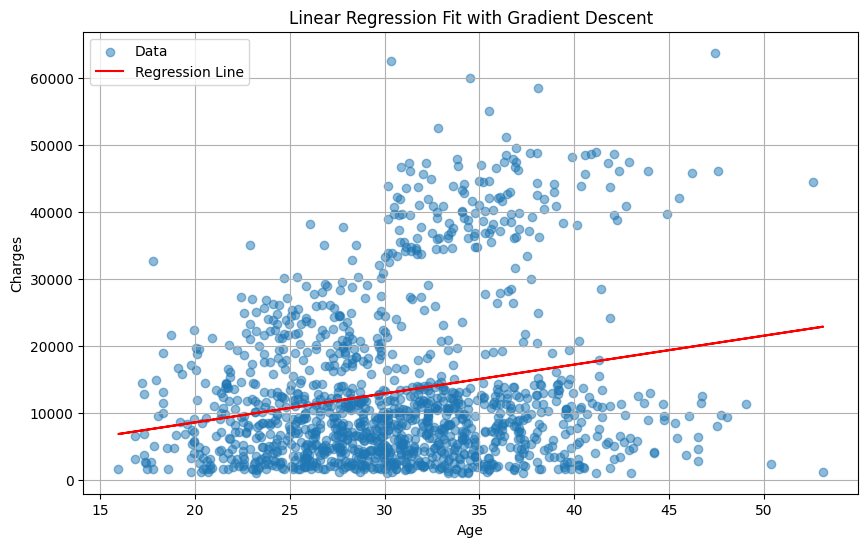

In [5]:
y_pred_final = w_final * X + b_final

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X, y_pred_final, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Fit with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Visualize Gradient Descent Curve (MSE vs Weight)

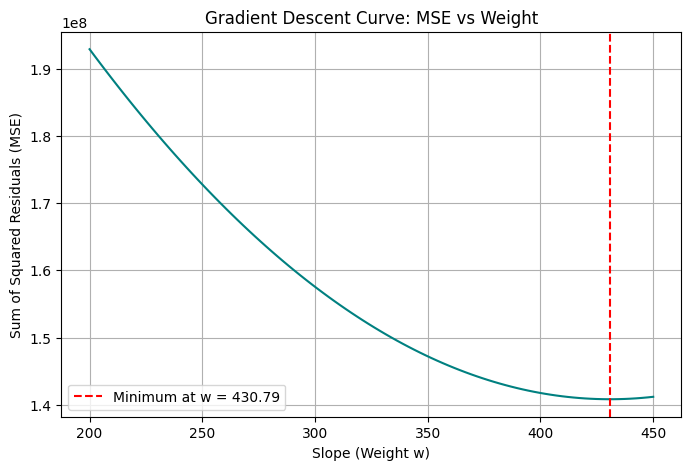

In [6]:
# Simulate loss curve (MSE vs slope w) while fixing bias
import numpy as np
import matplotlib.pyplot as plt

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

w_range = np.linspace(200, 450, 100)
b_fixed = b_final  # keep the bias constant
loss_curve = [compute_mse(y, w * X + b_fixed) for w in w_range]

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(w_range, loss_curve, color='teal')
plt.xlabel('Slope (Weight w)')
plt.ylabel('Sum of Squared Residuals (MSE)')
plt.title('Gradient Descent Curve: MSE vs Weight')
plt.axvline(w_final, color='red', linestyle='--', label=f'Minimum at w = {w_final:.2f}')
plt.legend()
plt.grid(True)
plt.show()